# EDA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sns.set_theme()

## Load data

In [4]:
df = pd.read_pickle('../data/data.pkl') 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2022-01-01 01:00:00 to 2024-01-01 00:00:00
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   solar          17520 non-null  int64  
 1   wind_offshore  17520 non-null  int64  
 2   wind_onshore   17520 non-null  int64  
 3   total_load     17520 non-null  int64  
 4   price          17520 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 821.2 KB


In [6]:
df.describe().round(2)

,solar,wind_offshore,wind_onshore,total_load,price
count,17520.00,17520.00,17520.00,17520.00,17520.00
mean,5102.07,2622.89,6855.02,43650.04,241.92
std,7380.08,1994.46,5748.27,9299.06,131.53
min,0.00,23.00,63.00,1915.00,-222.36
25%,0.00,834.00,2091.00,39456.00,160.00
50%,372.00,2112.00,5208.00,44338.00,217.00
75%,8685.00,4375.00,10509.25,49335.25,304.94
max,31286.00,6664.00,25740.00,85027.00,871.00


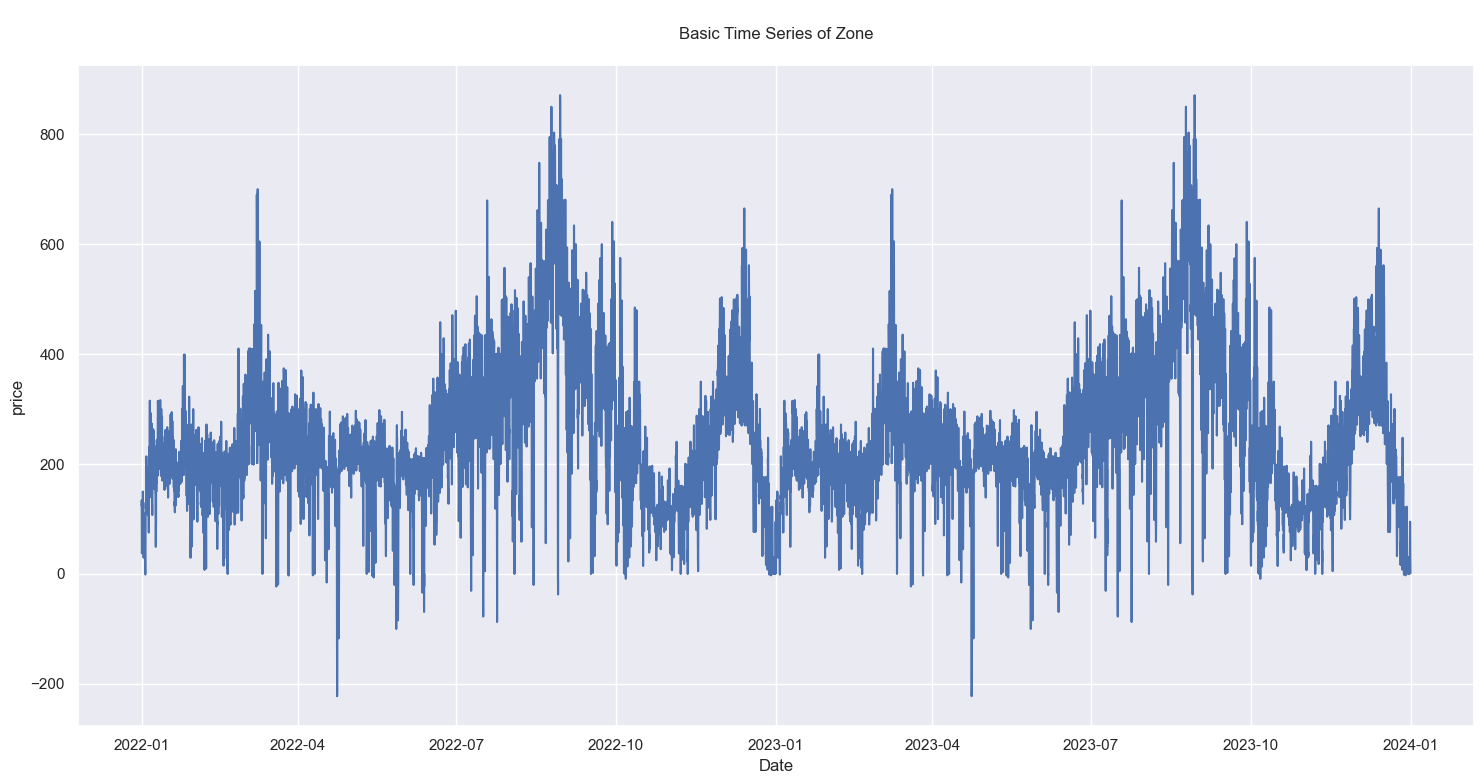

In [7]:
plt.figure(figsize=(15,8))
g = sns.lineplot(data=df, x=df.index, y='price')  # Plot on current subplot
g.set_title(f"\nBasic Time Series of Zone\n", fontsize=12)  # Set title with zone name

# Adjust overall layout (optional)
plt.tight_layout()  # Adjust spacing between subplots

# Display the figure
plt.show()

# LSTM

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
data = df.filter(['price'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

16644

In [10]:
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.31742518],
       [0.31742518],
       [0.32593107],
       ...,
       [0.21699166],
       [0.21246433],
       [0.20484561]])

In [11]:
# Create the training data set 
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.31742518, 0.31742518, 0.32593107, 0.25715226, 0.23782652,
       0.23968318, 0.24049718, 0.2429392 , 0.24879271, 0.26744165,
       0.27360613, 0.28029194, 0.29002341, 0.29190751, 0.29224592,
       0.29599583, 0.31916295, 0.34053743, 0.33720824, 0.33167484,
       0.31484598, 0.29722141, 0.29251116, 0.28126143, 0.25557913,
       0.25147253, 0.24816163, 0.23532963, 0.23040901, 0.23444245,
       0.23494549, 0.24160386, 0.24814334, 0.25825894, 0.26747823,
       0.26397527, 0.26240214, 0.24632326, 0.24824395, 0.27195983,
       0.28111509, 0.29483427, 0.30388893, 0.29474281, 0.2737982 ,
       0.24559157, 0.24571047, 0.23349126, 0.20365662, 0.20336394,
       0.20330907, 0.20241275, 0.20245848, 0.20337309, 0.23627168,
       0.28599912, 0.31312651, 0.32218117, 0.31224848, 0.31238567])]
[0.3131265091095339]

[array([0.31742518, 0.31742518, 0.32593107, 0.25715226, 0.23782652,
       0.23968318, 0.24049718, 0.2429392 , 0.24879271, 0.26744165,
       0.27360613, 0.28029194, 0.290

## LSTM

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2024-11-03 12:21:02.721481: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16584/16584 ━━━━━━━━━━━━━━━━━━━━ 255s 15ms/step - loss: 0.0027


In [13]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


37.12064996189554

/var/folders/8k/8n8mf6jn28537sc4vvz36rhh0000gn/T/ipykernel_3218/3791943124.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


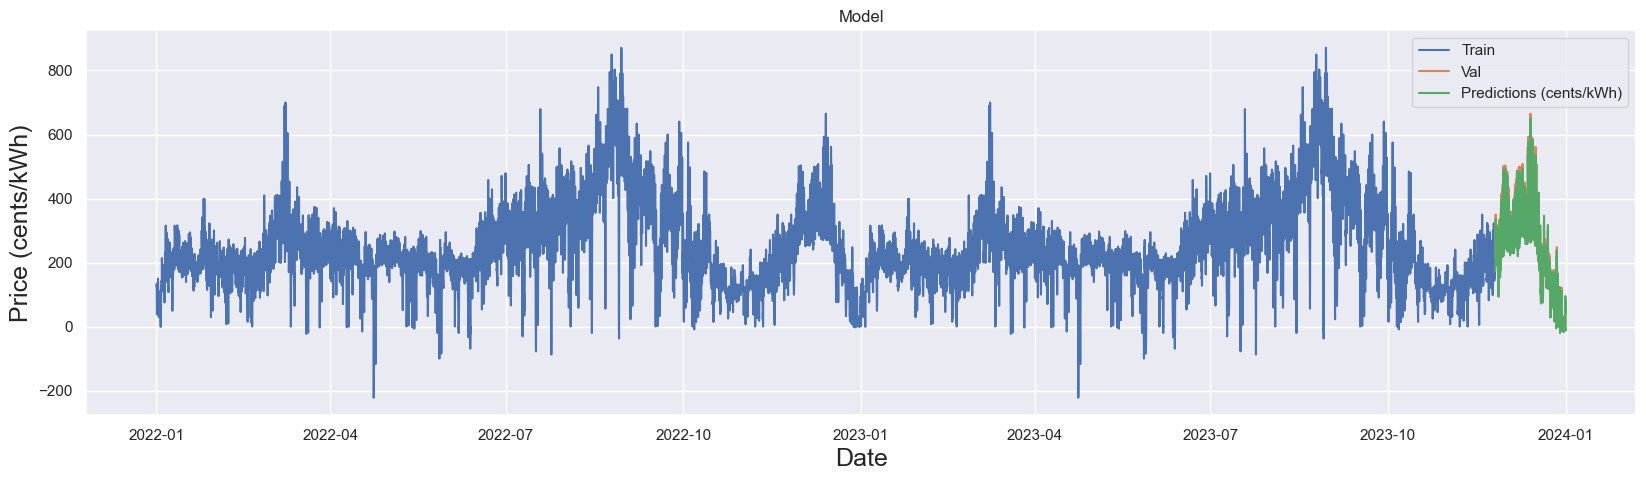

In [14]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(20,5))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price (cents/kWh)', fontsize=18)
plt.plot(train['price'])
plt.plot(valid[['price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions (cents/kWh)'], loc='upper right')
plt.show()

In [15]:
valid['Error'] = valid['price'] - valid['Predictions']
valid.head(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Comic Sans MS',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

/var/folders/8k/8n8mf6jn28537sc4vvz36rhh0000gn/T/ipykernel_3218/3947543293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Error'] = valid['price'] - valid['Predictions']


,price,Predictions,Error
Date,,,
2023-11-25 13:00:00,219.000000,172.801819,46.198181
2023-11-25 14:00:00,250.000000,182.644180,67.355820
2023-11-25 15:00:00,290.150000,239.642166,50.507834
2023-11-25 16:00:00,290.460000,296.554138,-6.094138
2023-11-25 17:00:00,327.360000,283.822388,43.537612
2023-11-25 18:00:00,349.900000,323.500488,26.399512
2023-11-25 19:00:00,337.950000,337.545227,0.404773
2023-11-25 20:00:00,300.050000,303.350739,-3.300739
2023-11-25 21:00:00,270.630000,251.121277,19.508723


In [17]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [18]:
lstm_smape = smape(valid['price'], valid['Predictions'])
print(f"LSTM sMAPE with Decomposed Features: {lstm_smape:.2f}")

LSTM sMAPE with Decomposed Features: 19.96


In [16]:
valid['Error'].mean()

19.473072255327278